In [123]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc,classification_report,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [125]:
gender_encoder = LabelEncoder()
damage_encoder = LabelEncoder()
age_encoder = LabelEncoder()

train_data['Gender'] = gender_encoder.fit_transform(train_data['Gender'])
train_data['Vehicle_Age'] = age_encoder.fit_transform(train_data['Vehicle_Age'])
train_data['Vehicle_Damage'] = damage_encoder.fit_transform(train_data['Vehicle_Damage'])

test_data['Gender'] = gender_encoder.transform(test_data['Gender'])
test_data['Vehicle_Age'] = age_encoder.transform(test_data['Vehicle_Age'])
test_data['Vehicle_Damage'] = damage_encoder.transform(test_data['Vehicle_Damage'])

In [126]:
features = ['Gender', 'Age', 'Driving_License', 
            'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 
            'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
target = 'Response'

X = train_data[features]
Y = train_data[target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [127]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [128]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [129]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/15
8933/8933 [==============================] - 10s 1ms/step - loss: 0.2719 - accuracy: 0.8777 - val_loss: 0.2708 - val_accuracy: 0.8765
Epoch 2/15
8933/8933 [==============================] - 9s 1ms/step - loss: 0.2692 - accuracy: 0.8777 - val_loss: 0.2688 - val_accuracy: 0.8765
Epoch 3/15
8933/8933 [==============================] - 9s 1ms/step - loss: 0.2689 - accuracy: 0.8778 - val_loss: 0.2686 - val_accuracy: 0.8765
Epoch 4/15
8933/8933 [==============================] - 8s 924us/step - loss: 0.2686 - accuracy: 0.8777 - val_loss: 0.2677 - val_accuracy: 0.8766
Epoch 5/15
8933/8933 [==============================] - 8s 934us/step - loss: 0.2684 - accuracy: 0.8778 - val_loss: 0.2677 - val_accuracy: 0.8766
Epoch 6/15
8933/8933 [==============================] - 8s 905us/step - loss: 0.2682 - accuracy: 0.8778 - val_loss: 0.2688 - val_accuracy: 0.8765
Epoch 7/15
8933/8933 [==============================] - 8s 900us/step - loss: 0.2682 - accuracy: 0.8777 - val_loss: 0.2684 - val_

In [130]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  

2978/2978 [==============================] - 2s 512us/step


In [131]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83513
           1       0.57      0.00      0.01     11765

    accuracy                           0.88     95278
   macro avg       0.72      0.50      0.47     95278
weighted avg       0.84      0.88      0.82     95278



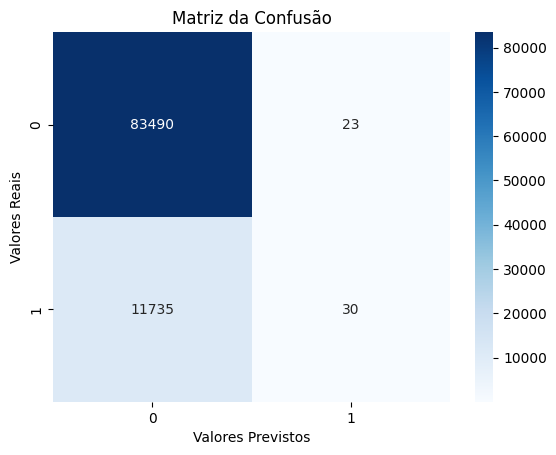

In [132]:
cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz da Confusão')
plt.show()

2978/2978 [==============================] - 2s 532us/step


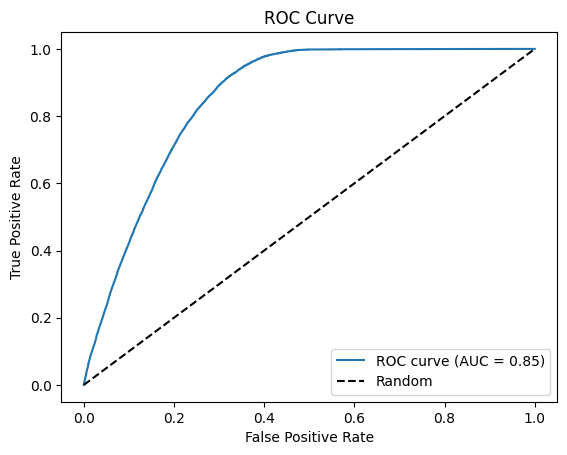

In [133]:
y_pred_prob = model.predict(X_test)

y_pred_prob_positive = y_pred_prob.ravel()

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob_positive)

auc = roc_auc_score(Y_test, y_pred_prob_positive)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [134]:
new_case = {
    'Gender': 'Male',
    'Age': 44,
    'Driving_License': 1,
    'Region_Code': 28.0,
    'Previously_Insured': 0,
    'Vehicle_Age': '> 2 Years',
    'Vehicle_Damage': 'Yes',
    'Annual_Premium': 40454.0,
    'Policy_Sales_Channel': 26.0,
    'Vintage': 217
}
new_case_df = pd.DataFrame([new_case])

new_case_df['Gender'] = gender_encoder.transform(new_case_df['Gender'])
new_case_df['Vehicle_Age'] = age_encoder.transform(new_case_df['Vehicle_Age'])
new_case_df['Vehicle_Damage'] = damage_encoder.transform(new_case_df['Vehicle_Damage'])

In [135]:
prediction = model.predict(new_case_df)
print('Previsão para o novo caso:', prediction)

1/1 [==============================] - 0s 37ms/step
Previsão para o novo caso: [[0.]]
